In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df=pd.read_csv(r'G:\machinelearning\diabetes2.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Pregnancies', ylabel='count'>

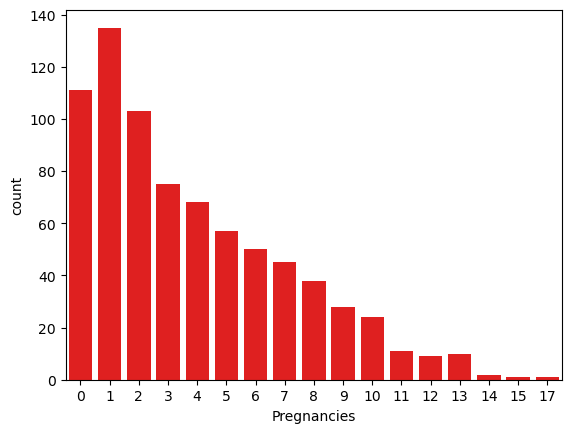

In [11]:
sns.countplot(df,x='Pregnancies',color='red')

<Axes: xlabel='Pregnancies', ylabel='Count'>

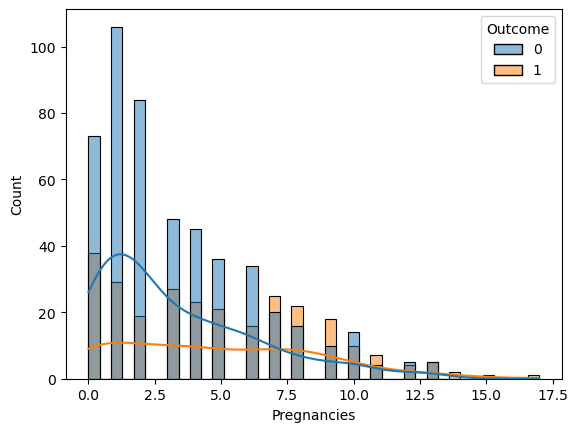

In [12]:
sns.histplot(df,x='Pregnancies',hue='Outcome',bins=40,kde=True)

In [14]:
#model
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [16]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
xtr.shape,xts.shape,ytr.shape,yts.shape

((614, 8), (154, 8), (614,), (154,))

In [24]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier
Dtree=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)

In [25]:
Dtree.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [27]:
ypred=Dtree.predict(xts)
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
print('accuracy of model with gini index:{0:0.4f}'.format(accuracy_score(yts,ypred)))

accuracy of model with gini index:0.7987


In [29]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(yts,ypred)
conf_matrix

array([[88, 11],
       [20, 35]], dtype=int64)

<Axes: >

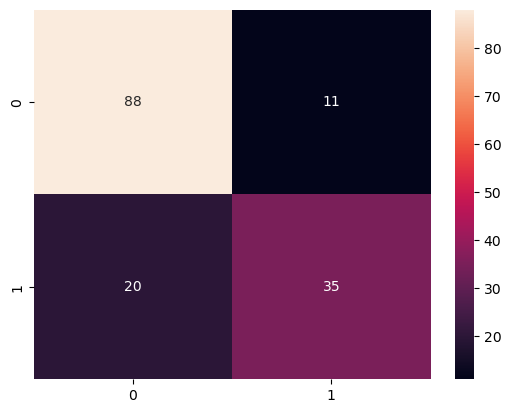

In [32]:
sns.heatmap(conf_matrix,annot=True,fmt='d')

In [33]:
#classification report
from sklearn.metrics import classification_report
crep=classification_report(yts,ypred)
print(crep)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



[Text(0.43617021276595747, 0.9166666666666666, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.17553191489361702, 0.75, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.0851063829787234, 0.5833333333333334, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0425531914893617, 0.4166666666666667, 'x[6] <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.02127659574468085, 0.25, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.06382978723404255, 0.25, 'x[6] <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.0425531914893617, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0851063829787234, 0.08333333333333333, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.1276595744680851, 0.4166666666666667, 'x[2] <= 37.0\ngini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.10638297872340426, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1489361702

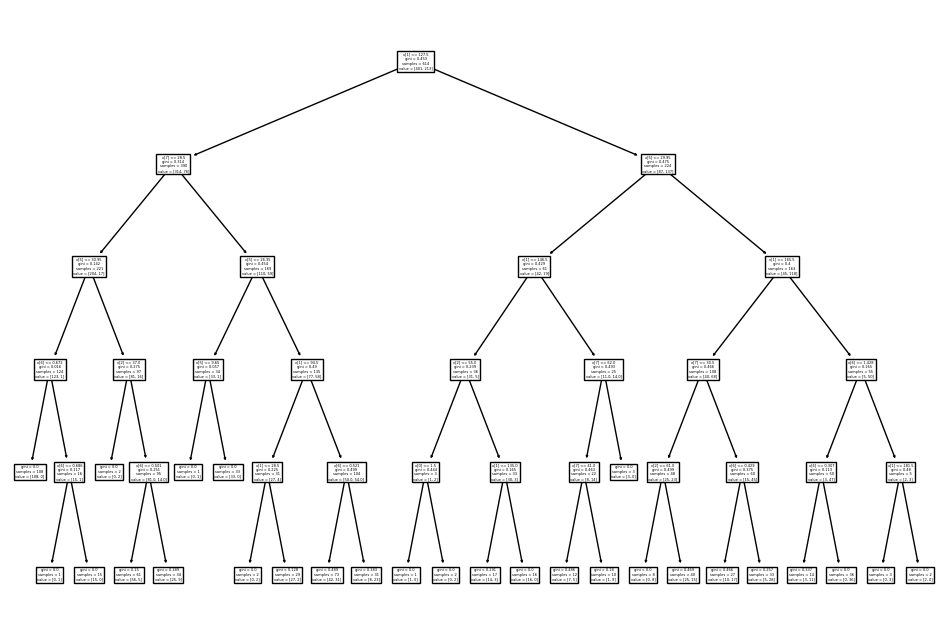

In [36]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(Dtree.fit(xtr,ytr))